In [1]:
import pandas as pd
import numpy as np
import csv

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [2]:
train_raw = pd.read_csv("dataset/train.csv")

test_raw  = pd.read_csv('dataset/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
train_data = train_raw.copy(deep = True)

#preview data
print (train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      26048 non-null  int64  
 1   name            26048 non-null  object 
 2   street          26048 non-null  object 
 3   type            26048 non-null  object 
 4   model           24768 non-null  object 
 5   market_segment  26048 non-null  object 
 6   type_of_area    26048 non-null  object 
 7   bedrooms        25644 non-null  object 
 8   bathrooms       24812 non-null  float64
 9   district        26048 non-null  int64  
 10  region          26048 non-null  object 
 11  planning_area   26048 non-null  object 
 12  subszone        26048 non-null  object 
 13  lat             26048 non-null  float64
 14  lng             26048 non-null  float64
 15  tenure          25761 non-null  object 
 16  built_year      16005 non-null  float64
 17  no_of_units     25006 non-null 

In [3]:
def check_missing_values(df):
    print("Stats for missing values:")
    print("-"*15)
    for col in df:
        print(f"{col}: ", df[col].isna().sum())
check_missing_values(train_data)
check_missing_values(test_raw)

Stats for missing values:
---------------
listing_id:  0
name:  0
street:  0
type:  0
model:  1280
market_segment:  0
type_of_area:  0
bedrooms:  404
bathrooms:  1236
district:  0
region:  0
planning_area:  0
subszone:  0
lat:  0
lng:  0
tenure:  287
built_year:  10043
no_of_units:  1042
area_size:  2
eco_category:  0
accessibility:  0
date_listed:  0
price:  0
Stats for missing values:
---------------
listing_id:  0
name:  0
street:  0
type:  0
model:  388
market_segment:  0
type_of_area:  0
bedrooms:  118
bathrooms:  337
district:  0
region:  0
planning_area:  0
subszone:  0
lat:  0
lng:  0
tenure:  85
built_year:  2875
no_of_units:  326
area_size:  0
eco_category:  0
accessibility:  0
date_listed:  0


Training set missing values counts:
model, bedrooms, bathrooms, tenure, built_year**, no_of_units, area_size

Testing set missing values:
model, bedrooms, bathrooms, tenure, built_year, no_of_units

In [4]:
train_data.describe(include = 'all')

,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
count,2.604800e+04,26048,26048,26048,24768,26048,26048,25644,24812.000000,26048.000000,...,26048.000000,26048.000000,25761,16005.000000,25006.000000,26046.000000,26048,26048,26048,2.604800e+04
unique,NaN,1650,3442,2,14,1,1,17,NaN,NaN,...,NaN,NaN,53,NaN,NaN,NaN,1,1,359,NaN
top,NaN,marina one residences,23 marina way,apartment,apartment,ocr,strata,3,NaN,NaN,...,NaN,NaN,leasehold/99 years,NaN,NaN,NaN,uncategorized,guarded,2021-10-12,NaN
freq,NaN,668,274,13958,13306,26048,26048,7306,NaN,NaN,...,NaN,NaN,15300,NaN,NaN,NaN,26048,26048,1728,NaN
mean,5.495573e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.278091,12.211609,...,1.321145,103.846138,NaN,2010.926398,462.350636,1248.902096,NaN,NaN,NaN,2.994669e+06
std,2.608064e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.147204,7.020134,...,0.038569,0.049865,NaN,11.915875,423.476259,1066.102020,NaN,NaN,NaN,4.324294e+06
min,1.000122e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,1.239337,103.696215,NaN,1799.000000,1.000000,226.000000,NaN,NaN,NaN,5.566000e+05
25%,3.229224e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.000000,...,1.296472,103.820262,NaN,2010.000000,130.000000,678.000000,NaN,NaN,NaN,1.331000e+06
50%,5.486808e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,11.000000,...,1.313384,103.843081,NaN,2014.000000,366.000000,958.000000,NaN,NaN,NaN,1.851800e+06
75%,7.764926e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,18.000000,...,1.341210,103.879673,NaN,2016.000000,646.000000,1356.000000,NaN,NaN,NaN,2.948000e+06


# 1. De-duplication

In [5]:
train_data.nunique()

listing_id        26048
name               1650
street             3442
type                  2
model                14
market_segment        1
type_of_area          1
bedrooms             17
bathrooms             9
district             27
region                5
planning_area        38
subszone            193
lat                3118
lng                3118
tenure               53
built_year           60
no_of_units         526
area_size          1178
eco_category          1
accessibility         1
date_listed         359
price              4704
dtype: int64

## 1.1 Drop unnecessary columns

Since the duplicated values are the same across train and test datasets, we can safely discard them.

In [6]:
train_data.drop(columns=["market_segment", "type_of_area", "eco_category", "accessibility"], inplace=True)
train_data.head()

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,3,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,3,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,1999.0,24.0,1259.0,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,4,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,1959.0,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,3,2.0,14,east region,bedok,kaki bukit,1.329367,103.905791,freehold,NaN,237.0,883.0,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2021-12-24,2262700.0


## 1.2 Drop duplicate rows
Although it may seem that this contains no duplicates (all listing id are unique), we need to check whether their attributes are the same too.

An assumption made here is that:
* if all attributes (except listing_id) are the same, they are duplicate records
* if prices are different, they are unique records

Reason for removing 1) records:
* it may affect our metrics, making us believe that our models are performing well
* it is very unlikely for 1) to be unique records, thus they do not come from a real distribution

In [7]:
train_data.drop(columns=["listing_id", "price"]).duplicated().sum()

1098

In [8]:
# count records with duplicated everything
train_data.drop(columns=["listing_id"]).duplicated().sum()

326

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     26048 non-null  int64  
 1   name           26048 non-null  object 
 2   street         26048 non-null  object 
 3   type           26048 non-null  object 
 4   model          24768 non-null  object 
 5   bedrooms       25644 non-null  object 
 6   bathrooms      24812 non-null  float64
 7   district       26048 non-null  int64  
 8   region         26048 non-null  object 
 9   planning_area  26048 non-null  object 
 10  subszone       26048 non-null  object 
 11  lat            26048 non-null  float64
 12  lng            26048 non-null  float64
 13  tenure         25761 non-null  object 
 14  built_year     16005 non-null  float64
 15  no_of_units    25006 non-null  float64
 16  area_size      26046 non-null  float64
 17  date_listed    26048 non-null  object 
 18  price 

In [10]:
def drop_complete_duplicates(df):
    attribute_columns = ['name', 'street', 'type', 'model', 'bedrooms', 'bathrooms', 'district',
       'region', 'planning_area', 'subszone', 'lat', 'lng', 'tenure',
       'built_year', 'no_of_units', 'area_size', 'date_listed', 'price']
    return df.drop_duplicates(subset=attribute_columns)
train_data = drop_complete_duplicates(train_data)

In [11]:
train_data.columns

Index(['listing_id', 'name', 'street', 'type', 'model', 'bedrooms',
       'bathrooms', 'district', 'region', 'planning_area', 'subszone', 'lat',
       'lng', 'tenure', 'built_year', 'no_of_units', 'area_size',
       'date_listed', 'price'],
      dtype='object')

In [12]:
train_data.shape

(25722, 19)

After duplicate removal, training set shape (26047,23) -> (25722,19)

# 2. Make up missing values

## 2.0 convert to their suitable datatypes (*skip this part and go to Section 2.1*)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25722 entries, 0 to 26047
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     25722 non-null  int64  
 1   name           25722 non-null  object 
 2   street         25722 non-null  object 
 3   type           25722 non-null  object 
 4   model          24445 non-null  object 
 5   bedrooms       25325 non-null  object 
 6   bathrooms      24488 non-null  float64
 7   district       25722 non-null  int64  
 8   region         25722 non-null  object 
 9   planning_area  25722 non-null  object 
 10  subszone       25722 non-null  object 
 11  lat            25722 non-null  float64
 12  lng            25722 non-null  float64
 13  tenure         25437 non-null  object 
 14  built_year     15794 non-null  float64
 15  no_of_units    24684 non-null  float64
 16  area_size      25720 non-null  float64
 17  date_listed    25722 non-null  object 
 18  price 

In [17]:
def convert_correct_dtypes(df):
    df["date_listed"] = pd.to_datetime(df["date_listed"])
    return df.astype({"listing_id":int,
                      "name": str,
                      "street": str,
                      "type": str,
                      "model":str,
                      "bedrooms": str,
                      "bathrooms":int,
                      "district": int,
                      "region": str,
                      "planning_area": str,
                      "subszone": str,
                      "tenure": str,
                      "built_year": int,
                      "no_of_units": int,
                      "area_size": float,
                      }, errors='ignore')
dedup_data = convert_correct_dtypes(train_data)

In [21]:
import numpy as np
b = 2.0
c = np.array(b)
print(type(b))
print(type(c))

<class 'float'>
<class 'numpy.ndarray'>


In [ ]:
discrete_attributes = ["name", "street", "type", "model", "bedrooms", "region",
                       "planning_area", "subszone", "tenure"]
for attr in discrete_attributes:
    unique_vars = list(dedup_data[attr].unique())
    print(attr)
    for v in unique_vars:
        if 'nan' in v.lower():
            print(' '*3, v)

In [18]:
dedup_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25722 entries, 0 to 26047
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     25722 non-null  int64         
 1   name           25722 non-null  object        
 2   street         25722 non-null  object        
 3   type           25722 non-null  object        
 4   model          25722 non-null  object        
 5   bedrooms       25722 non-null  object        
 6   bathrooms      24488 non-null  float64       
 7   district       25722 non-null  int64         
 8   region         25722 non-null  object        
 9   planning_area  25722 non-null  object        
 10  subszone       25722 non-null  object        
 11  lat            25722 non-null  float64       
 12  lng            25722 non-null  float64       
 13  tenure         25722 non-null  object        
 14  built_year     15794 non-null  float64       
 15  no_of_units    2468

## 2.1 Make up for missing values

In [13]:
check_missing_values(train_data)

Stats for missing values:
---------------
listing_id:  0
name:  0
street:  0
type:  0
model:  1277
bedrooms:  397
bathrooms:  1234
district:  0
region:  0
planning_area:  0
subszone:  0
lat:  0
lng:  0
tenure:  285
built_year:  9928
no_of_units:  1038
area_size:  2
date_listed:  0
price:  0


## Histogram for numerical variables

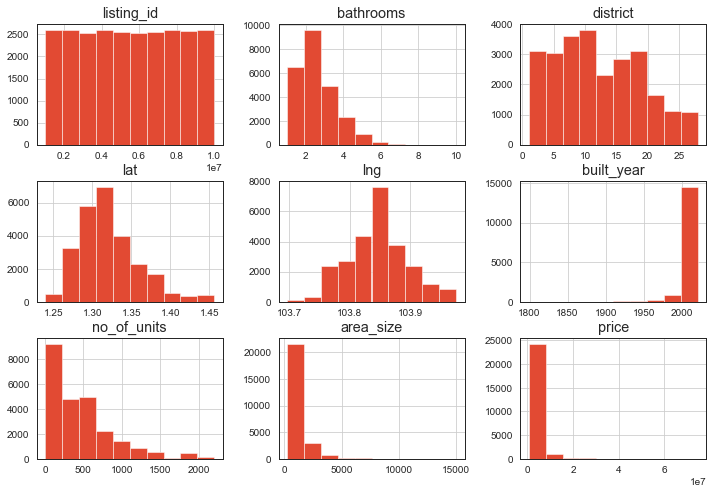

In [14]:
all_attributes = train_data.columns
hist = train_data.hist()

## Histogram for categorical variables
The following may run for a few minutes, you can skip and proceeed to the next cell.

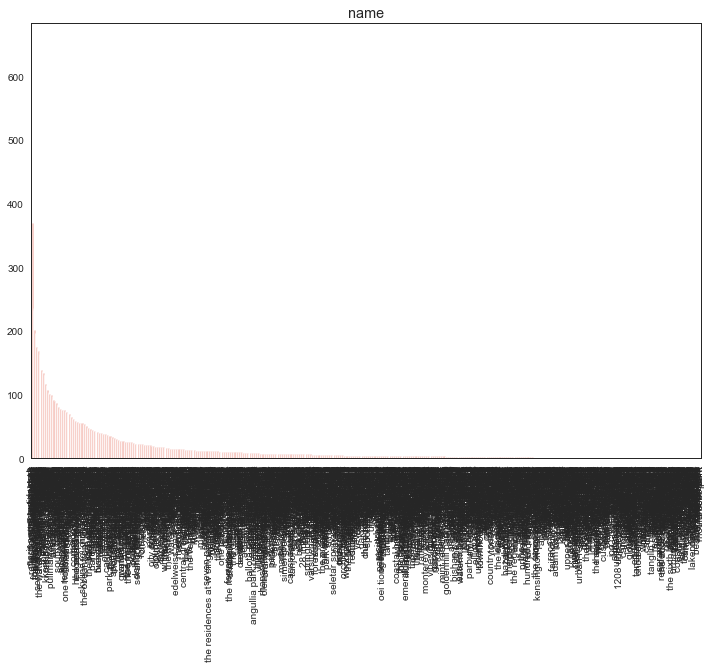

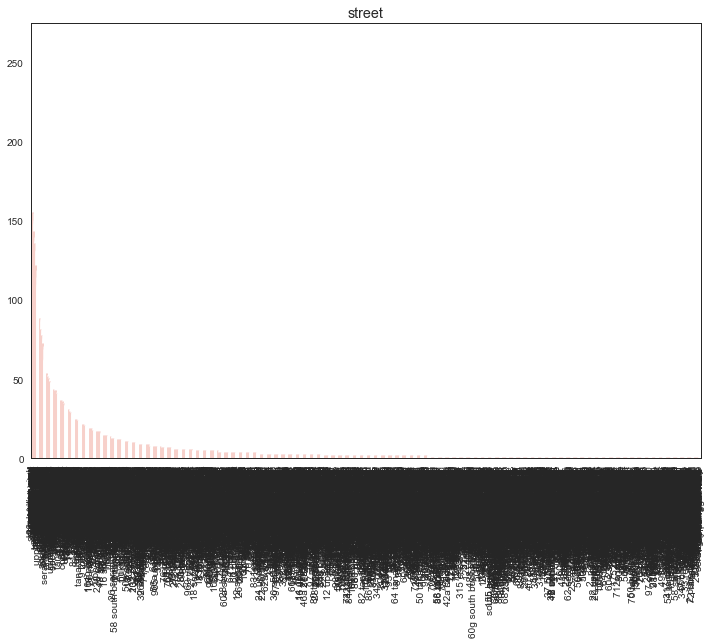

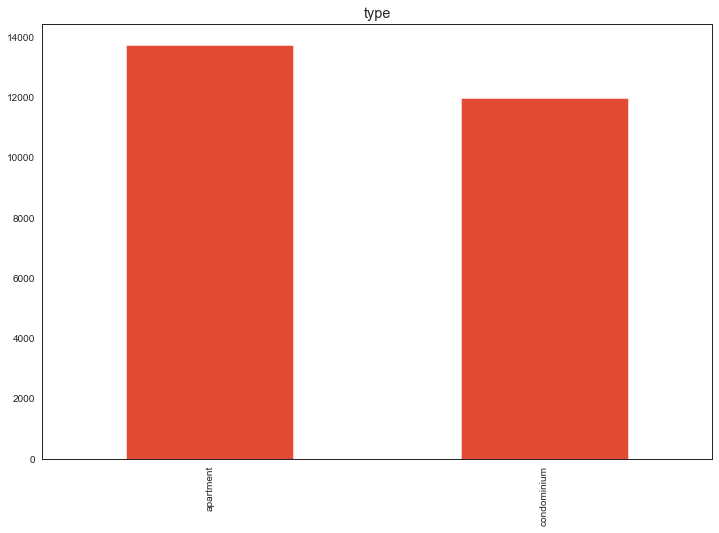

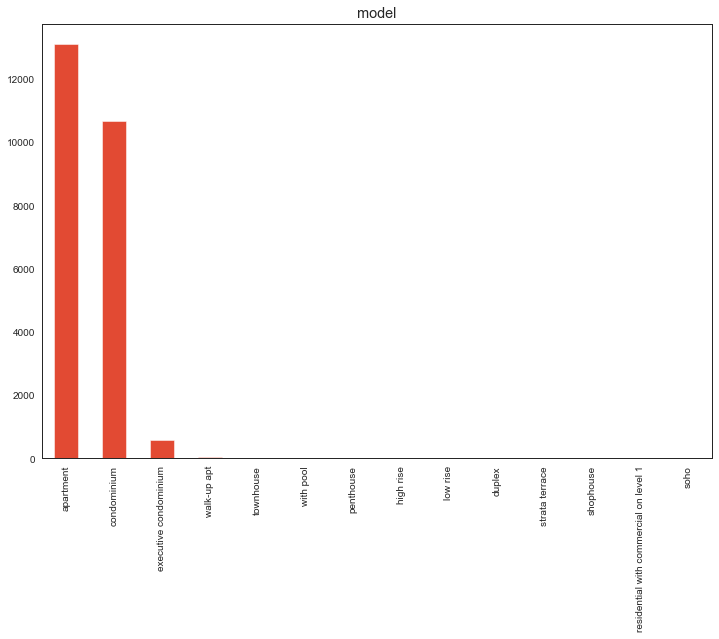

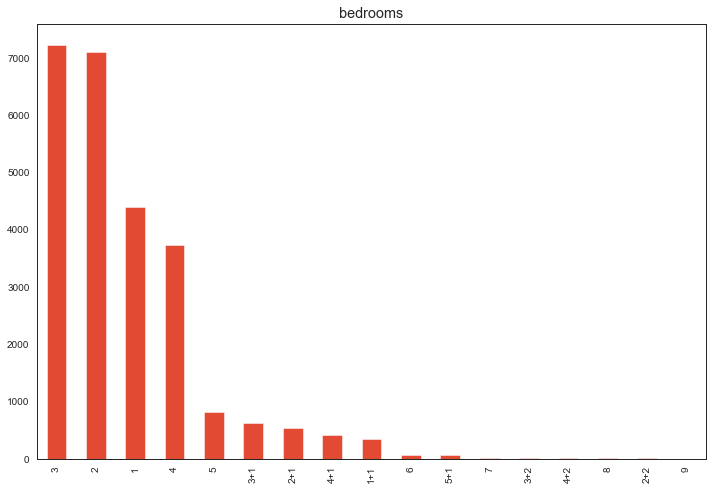

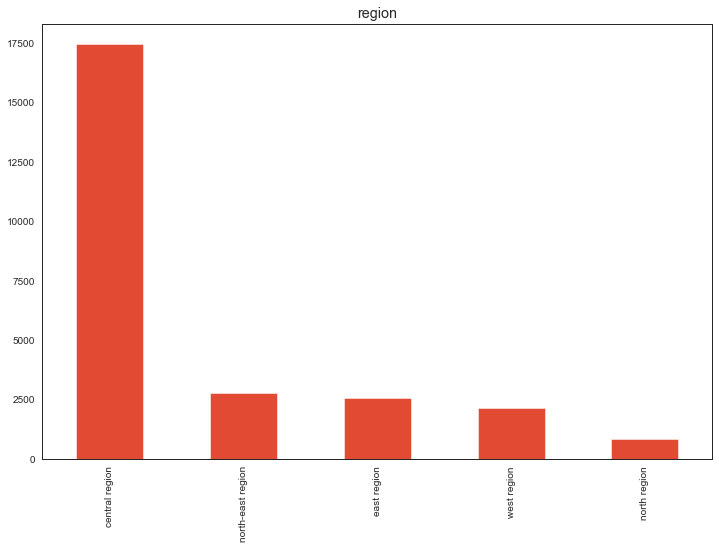

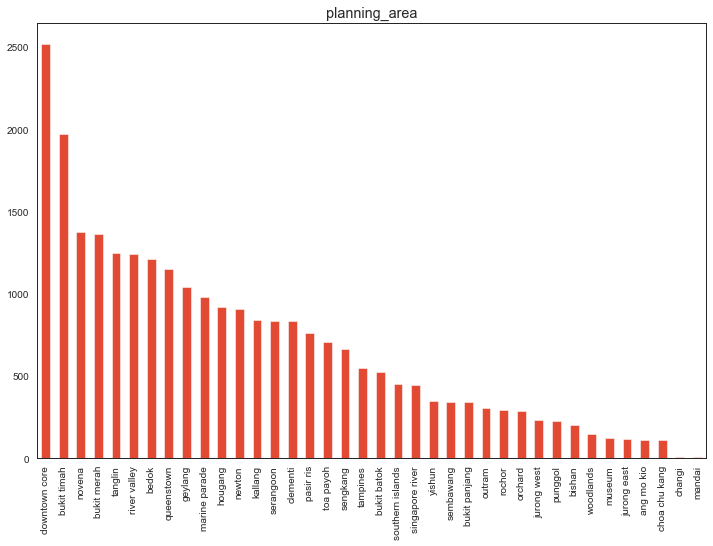

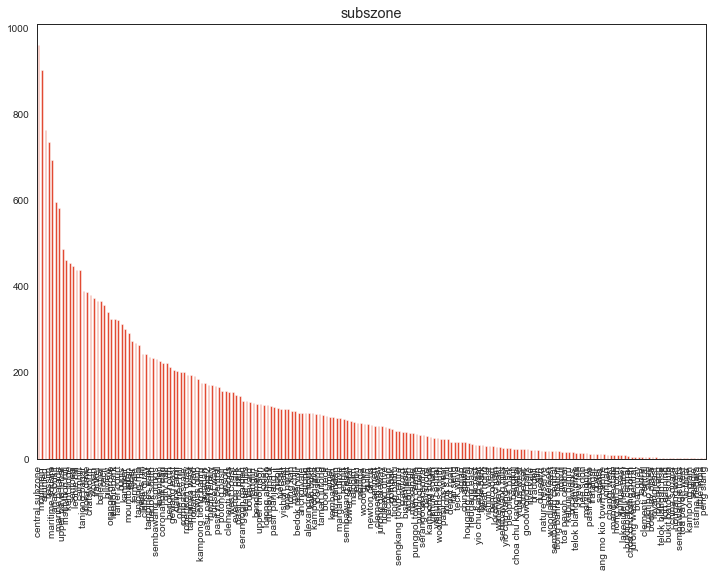

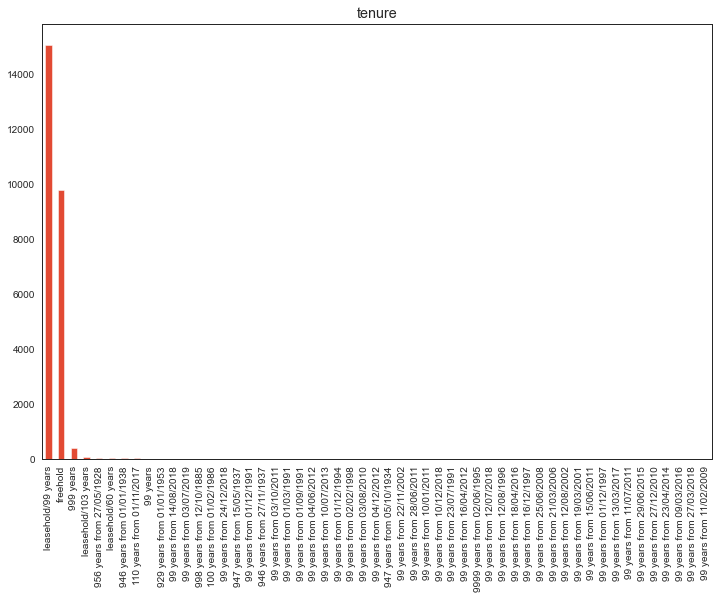

In [15]:
discrete_attributes = ["name", "street", "type", "model", "bedrooms", "region",
                       "planning_area", "subszone", "tenure"]
for attr in discrete_attributes:
    fig = plt.figure()
    ax = train_data[attr].value_counts().plot(kind='bar', title=attr )
    fig.savefig("plots/"+attr+".png")

# TODO:
is this long-tail effect or outlier?

未交房的condo的built_year处理方法：
- NaN
- 用estimated completion year (TOP) 补全
之后加个新的attribute *转化为使用年限*（负数/zero）



The set of properties with long built history largely overlap with the properties with a missing value.

tiong bahru estate was built in the 1930s, and emerald hill road was built in 1901.
But watermark robertson quay was built in 2008

### 2.1.1 Make up for missing `area_size`

In [18]:
missing_df = train_data.copy()
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25722 entries, 0 to 26047
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     25722 non-null  int64  
 1   name           25722 non-null  object 
 2   street         25722 non-null  object 
 3   type           25722 non-null  object 
 4   model          24445 non-null  object 
 5   bedrooms       25325 non-null  object 
 6   bathrooms      24488 non-null  float64
 7   district       25722 non-null  int64  
 8   region         25722 non-null  object 
 9   planning_area  25722 non-null  object 
 10  subszone       25722 non-null  object 
 11  lat            25722 non-null  float64
 12  lng            25722 non-null  float64
 13  tenure         25437 non-null  object 
 14  built_year     15794 non-null  float64
 15  no_of_units    24684 non-null  float64
 16  area_size      25720 non-null  float64
 17  date_listed    25722 non-null  object 
 18  price 

In [19]:
check_missing_values(missing_df)

Stats for missing values:
---------------
listing_id:  0
name:  0
street:  0
type:  0
model:  1277
bedrooms:  397
bathrooms:  1234
district:  0
region:  0
planning_area:  0
subszone:  0
lat:  0
lng:  0
tenure:  285
built_year:  9928
no_of_units:  1038
area_size:  2
date_listed:  0
price:  0


## Analysis of the missing values
* area_size: a little tricky, it depends on the # of bedrooms and bathrooms, but can be inferred from the dataset
* bedrooms: can look up from the table
* built_year: some are incorrect, some are unfinished projects thus having no built_year
* no. of units: can look up from the table

In [20]:
missing_df[missing_df.area_size.isna()]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
2415,4426068,guillemard road,guillemard road,condominium,NaN,4,NaN,14,central region,geylang,aljunied,1.30879,103.876948,NaN,NaN,NaN,NaN,2022-01-02,1320000.0
12891,8670725,the scotts tower,38 scotts road,condominium,condominium,2,2.0,9,central region,newton,cairnhill,1.30999,103.835500,leasehold/103 years,2016.0,231.0,NaN,2021-10-17,2475000.0


In [21]:
# correct area size by human label
missing_df.at[2415, "area_size"]= 922.0 # 810 for 2b3b plus 2x (549-495)
missing_df.at[12891, "area_size"] = 807.0

In [22]:
missing_df[missing_df.area_size.isna()]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price


In [23]:
train_data = missing_df

### 2.1.2 make up for missing `built_year`

In [47]:
attribute_lookup_table = train_data.drop(columns=["listing_id", "price"]).drop_duplicates()
attribute_lookup_table.shape

(24950, 17)

In [47]:
def fill_by_lookup(origin_df, attr_to_fill):
    # look up by comparing to all other attributes
    attr_to_compare = set(origin_df.columns)
    attr_to_compare = attr_to_compare - {"listing_id", "price", attr_to_fill}

    attr_to_compare = set("name")
    lookup_table = origin_df[origin_df[attr_to_fill].notnull()].drop_duplicates()
    similar_addresses = (
        origin_df.merge(lookup_table, how='left', on="name", suffixes=['', '_new'])[attr_to_fill+"_new"]
    )
    origin_df[attr_to_fill] = origin_df[attr_to_fill].combine_first(similar_addresses)
    return origin_df

In [24]:
missing_df[missing_df["built_year"].isna()].count()

listing_id       9928
name             9928
street           9928
type             9928
model            9299
bedrooms         9870
bathrooms        9355
district         9928
region           9928
planning_area    9928
subszone         9928
lat              9928
lng              9928
tenure           9649
built_year          0
no_of_units      8917
area_size        9928
date_listed      9928
price            9928
dtype: int64

In [56]:
attr_to_compare = ['name', 'street']
attr_to_fill="built_year"

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,3,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,3,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,1999.0,24.0,1259.0,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,4,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,1959.0,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,3,2.0,14,east region,bedok,kaki bukit,1.329367,103.905791,freehold,NaN,237.0,883.0,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2021-12-24,2262700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26011,2729733,the rise @ oxley,71 oxley rise,condominium,condominium,1,1.0,9,central region,museum,dhoby ghaut,1.297311,103.843201,freehold,2018.0,120.0,463.0,2021-12-29,1320000.0
26013,2373007,beauty world centre,upper bukit timah road,apartment,apartment,3+1,NaN,21,central region,bukit timah,anak bukit,1.342413,103.776539,leasehold/99 years,1984.0,80.0,1873.0,2021-10-12,1980000.0
26037,7139386,arthur road,arthur road,condominium,condominium,1,1.0,15,central region,marine parade,mountbatten,1.305398,103.888846,leasehold/99 years,NaN,NaN,461.0,2022-01-02,976800.0
26038,3320611,meraprime,301 jalan bukit ho swee,condominium,NaN,3,2.0,3,central region,bukit merah,tiong bahru station,1.287059,103.827788,leasehold/99 years,2006.0,213.0,1119.0,2021-12-13,2420000.0


Algorithm for finding the missing value of built_year:
```
for each unique property (unique by `name`):
   find the mode number of built_year,
   then use the mode number to fill in the built_year
```


#### Step 1: check the distribution of built_years for each property
Some properties may have multiple built years, thus we use the non-zero mode number as the value to fill

In [25]:
# build the lookup table
unique_properties = missing_df.name.unique()
count_1=count_2=0
for prop_name in unique_properties:
    # for each unique property, find the mode number of built_year,
    # then use the mode number to fill in the built_year
    all_prop_entries = missing_df[missing_df.name==prop_name]
    num_unique_built_years = all_prop_entries['built_year'].nunique()
    if num_unique_built_years>1:
        count_1 +=1
        if num_unique_built_years>2:
            count_2 +=1
            print(prop_name, ": ", num_unique_built_years)
            unique_yrs = all_prop_entries['built_year'].unique()
            print(f" - ", unique_yrs)
            print(" - mode: ", all_prop_entries['built_year'].value_counts())
print("More than 1 built years: ", count_1)
print("More than 2 built years: ", count_2)


corals at keppel bay :  3
 -  [2016. 2017. 2018.]
 - mode:  2016.0    132
2018.0      1
2017.0      1
Name: built_year, dtype: int64
royalgreen :  3
 -  [  nan 2021. 1960. 1930.]
 - mode:  2021.0    37
1930.0     3
1960.0     2
Name: built_year, dtype: int64
sloane residences :  3
 -  [  nan 1930. 1960. 2021.]
 - mode:  2021.0    5
1960.0    2
1930.0    2
Name: built_year, dtype: int64
canninghill piers :  3
 -  [  nan 1970. 2013. 1930.]
 - mode:  1970.0    5
1930.0    1
2013.0    1
Name: built_year, dtype: int64
reflections at keppel bay :  3
 -  [2011. 2013. 2006.]
 - mode:  2011.0    385
2013.0      3
2006.0      1
Name: built_year, dtype: int64
the gazania :  3
 -  [  nan 1930. 1985. 1960.]
 - mode:  1930.0    2
1985.0    1
1960.0    1
Name: built_year, dtype: int64
parc clematis :  3
 -  [  nan 1930. 1970. 1799.]
 - mode:  1930.0    3
1799.0    1
1970.0    1
Name: built_year, dtype: int64
the lilium :  3
 -  [2021.   nan 1970. 1930.]
 - mode:  2021.0    153
1970.0      1
1930.0   

> 146 properties have more than 1 unique built_years, while 12 properties have more than 2 built_years,

A valid built_year should be non-zero and recent (>1900), but sometimes it does happen that some are really old houses and their built_year are from the early 20th century.

In [27]:
missing_df[missing_df.name=="sloane residences"]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
73,7115005,sloane residences,balmoral road,apartment,apartment,2,2.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,743.0,2021-12-27,2679600.0
623,8879613,sloane residences,17 balmoral road,apartment,apartment,4,4.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,1496.0,2021-12-23,4820200.0
711,6873643,sloane residences,17 balmoral road,apartment,apartment,2,2.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,743.0,2022-01-01,2679600.0
847,1465708,sloane residences,balmoral road,apartment,apartment,3,3.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,1249.0,2021-12-28,3839000.0
1076,2521958,sloane residences,balmoral road,apartment,apartment,4,4.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,1496.0,2021-12-28,5005000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24982,1884272,sloane residences,balmoral road,apartment,apartment,4,4.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,1496.0,2021-12-17,4820200.0
25059,4931763,sloane residences,balmoral road,apartment,apartment,3,3.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,1249.0,2021-12-16,3839000.0
25438,3816584,sloane residences,balmoral road,apartment,apartment,3,3.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,1249.0,2021-12-28,3719100.0
25464,3541614,sloane residences,17 balmoral road,apartment,apartment,3,3.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,NaN,52.0,1249.0,2021-12-28,3572800.0


#### Step 2: execute the logic in step 1

In [31]:
unique_properties = missing_df.name.unique()
count=0
for prop_name in unique_properties:
    # find the non-zero mode built_year for each unique prop
    all_prop_entries = missing_df[missing_df.name==prop_name]
    mode_year = all_prop_entries["built_year"].mode().max()
    if np.isnan(mode_year):
        print("nan mode year for ", prop_name)
    fill_cond = (missing_df.name==prop_name) & (missing_df.built_year.isna())
    missing_df.loc[fill_cond, "built_year"] = mode_year
    count+=1

nan mode year for  infini at east coast
nan mode year for  sengkang grand residences
nan mode year for  tampines street 11
nan mode year for  van holland
nan mode year for  one-north eden
nan mode year for  provence residence
nan mode year for  affinity at serangoon
nan mode year for  sims avenue
nan mode year for  bartley vue
nan mode year for  the avenir
nan mode year for  boulevard 88
nan mode year for  mori
nan mode year for  lorong 34 geylang
nan mode year for  residence twenty-two
nan mode year for  39 flower road
nan mode year for  riverfront residences
nan mode year for  peak residence
nan mode year for  35 gilstead
nan mode year for  holland grove road
nan mode year for  brookvale drive
nan mode year for  parc central residences
nan mode year for  perfect ten
nan mode year for  parc greenwich
nan mode year for  wilshire residences
nan mode year for  the arden
nan mode year for  fernvale link
nan mode year for  shunfu road
nan mode year for  jadescape
nan mode year for  fernval

In [32]:
print(count)

1650


When a mode number is NaN, it means there is no way to infer the missing value from other records.
We have to manually fill in the built_year for the following properties.

In [33]:
still_missing_props = missing_df[missing_df.built_year.isna()].name.unique()
still_missing_props

array(['infini at east coast', 'sengkang grand residences',
       'tampines street 11', 'van holland', 'one-north eden',
       'provence residence', 'affinity at serangoon', 'sims avenue',
       'bartley vue', 'the avenir', 'boulevard 88', 'mori',
       'lorong 34 geylang', 'residence twenty-two', '39 flower road',
       'riverfront residences', 'peak residence', '35 gilstead',
       'holland grove road', 'brookvale drive', 'parc central residences',
       'perfect ten', 'parc greenwich', 'wilshire residences',
       'the arden', 'fernvale link', 'shunfu road', 'jadescape',
       'fernvale road', 'the tre ver', 'phoenix residences',
       'the antares', 'beach road', 'hougang avenue 7', 'jalan lempeng',
       'ikigai', 'pasir ris heights', 'yishun close', 'the commodore',
       'river valley road', 'upper boon keng road', '77 @ east coast',
       'lattice one', 'jalan kemaman', 'canberra walk', 'haus on handy',
       '19 nassim', 'phoenix road', 'shenton way', 'harbour vi

#### check with the sloane residence above, all missing built_years has been replaced by 2021

In [35]:
missing_df[missing_df.name=="sloane residences"]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
73,7115005,sloane residences,balmoral road,apartment,apartment,2,2.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,743.0,2021-12-27,2679600.0
623,8879613,sloane residences,17 balmoral road,apartment,apartment,4,4.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,1496.0,2021-12-23,4820200.0
711,6873643,sloane residences,17 balmoral road,apartment,apartment,2,2.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,743.0,2022-01-01,2679600.0
847,1465708,sloane residences,balmoral road,apartment,apartment,3,3.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,1249.0,2021-12-28,3839000.0
1076,2521958,sloane residences,balmoral road,apartment,apartment,4,4.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,1496.0,2021-12-28,5005000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24982,1884272,sloane residences,balmoral road,apartment,apartment,4,4.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,1496.0,2021-12-17,4820200.0
25059,4931763,sloane residences,balmoral road,apartment,apartment,3,3.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,1249.0,2021-12-16,3839000.0
25438,3816584,sloane residences,balmoral road,apartment,apartment,3,3.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,1249.0,2021-12-28,3719100.0
25464,3541614,sloane residences,17 balmoral road,apartment,apartment,3,3.0,10,central region,tanglin,nassim,1.315689,103.832318,freehold,2021.0,52.0,1249.0,2021-12-28,3572800.0


In [36]:
missing_df[missing_df.name=="infini at east coast"]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
4,9667539,infini at east coast,east coast road,apartment,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2021-12-24,2262700.0
739,9806074,infini at east coast,east coast road,apartment,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2022-01-01,2200000.0
1265,3526644,infini at east coast,east coast road,apartment,apartment,2+1,2.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,753.0,2021-12-27,1700600.0
1535,8104799,infini at east coast,east coast road,apartment,apartment,2,2.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,752.0,2021-12-31,1683000.0
1546,7203877,infini at east coast,east coast road,apartment,apartment,4,4.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1249.0,2021-12-29,2406800.0
2152,9028396,infini at east coast,east coast road,apartment,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2021-12-11,2200000.0
2932,2229832,infini at east coast,east coast road,apartment,apartment,2,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,753.0,2021-12-06,1595000.0
3032,9236439,infini at east coast,east coast road,apartment,apartment,3,2.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,969.0,2021-12-28,2104300.0
4310,3389969,infini at east coast,east coast road,apartment,apartment,2,2.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,753.0,2021-12-17,1702800.0
5569,2778904,infini at east coast,east coast road,apartment,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1603.0,2021-12-09,2901800.0


In [37]:
too_old_props = missing_df[missing_df.built_year < 1900].name.unique()
too_old_props

array(['neu at novena', 'cuscaden reserve', 'parc clematis'], dtype=object)

In [38]:
still_missing_props

array(['infini at east coast', 'sengkang grand residences',
       'tampines street 11', 'van holland', 'one-north eden',
       'provence residence', 'affinity at serangoon', 'sims avenue',
       'bartley vue', 'the avenir', 'boulevard 88', 'mori',
       'lorong 34 geylang', 'residence twenty-two', '39 flower road',
       'riverfront residences', 'peak residence', '35 gilstead',
       'holland grove road', 'brookvale drive', 'parc central residences',
       'perfect ten', 'parc greenwich', 'wilshire residences',
       'the arden', 'fernvale link', 'shunfu road', 'jadescape',
       'fernvale road', 'the tre ver', 'phoenix residences',
       'the antares', 'beach road', 'hougang avenue 7', 'jalan lempeng',
       'ikigai', 'pasir ris heights', 'yishun close', 'the commodore',
       'river valley road', 'upper boon keng road', '77 @ east coast',
       'lattice one', 'jalan kemaman', 'canberra walk', 'haus on handy',
       '19 nassim', 'phoenix road', 'shenton way', 'harbour vi

In [119]:
with open("property_to_correct.csv", 'w+') as f:
    l = list(still_missing_props) + list(too_old_props)
    # writer = csv.writer(f)
    for p in l:
        f.write(p+"\n")

In [ ]:
train_data = missing_df
train_data.to_csv("dataset/train_ziji_feb27.csv")

## 2.2 Convert to approprate data types

In [39]:
train_data.type.unique()

array(['condominium', 'apartment'], dtype=object)

In [40]:
train_data.model.unique()

array(['condominium', 'apartment', 'executive condominium', nan,
       'walk-up apt', 'townhouse', 'soho', 'penthouse', 'duplex',
       'high rise', 'residential with commercial on level 1', 'with pool',
       'low rise', 'shophouse', 'strata terrace'], dtype=object)